In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [32]:
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
accuracy_score(y_test,yhat)

0.9333333333333333

'''
n_estimators: Número de árboles 
Criterion: Gini o Entropy
max_depth: La profundidad del árbol, por default el árbol se extiede hasta alcanzar cero impurezas
max_features: El número de atributos para hacer un split, por default se utilizan todos
max_leaf_nodes: Por default se crean un número ilimitado de nodos hoja
min_impurity_decrease: El valor minimo de impureza para que un nodo se divida
min_samples_split: Crea un umbral para dividir un nodo, si su impureza esta por encima del umbral se divide
min_weight_fraction_leaf: El minimo valor de la suma ponderada de los pesos requerido para ser un nodo hoja
splitter: La estrategía utilizada para dividir un nodo, puede ser "best" o "random"
bootstrap: Si se utilizan todos los patrones para el entrenamiento (=False)
n_jobs: Utilizar núcleos del procesador
max_samples: El número de muestras máximas para entrenar cada árbol, el default utiliza todas las muestras.
'''


'''
n_estimators: int, default=100
Criterion: Gini o Entropy
max_depth: default = None, int
max_features: default=None, int, float, auto, sqrt, log2
max_leaf_nodes: default=None, int
min_impurity_decrease: default=0, float
min_samples_split: default=2, int, float
min_weight_fraction_leaf: default=0, float
splitter: "best", "random"
bootstrap: default=True, bool
n_jobs= int
max_samples: int, default=None
'''

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators= 30,
                            criterion= "entropy",
                             max_depth= 5,
                             max_features= "auto",
                             max_leaf_nodes= 4,
                             min_impurity_decrease= 0.1,
                             min_samples_split= 2,
                             n_jobs= -1)

clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,yhat))

Accuracy:  0.9555555555555556


In [7]:
clf.base_estimator_ #El template base para generar los árboles 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
clf.n_features_ 

4

In [11]:
clf.feature_importances_

array([0.1343596 , 0.        , 0.43353593, 0.43210447])

Feature ranking:
1. feature 2 (0.433499)
2. feature 3 (0.431898)
3. feature 0 (0.104500)
4. feature 1 (0.030103)


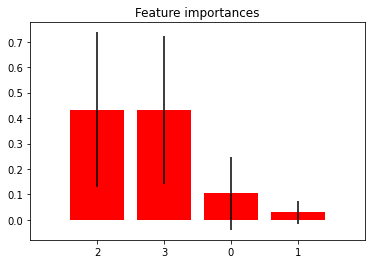

In [12]:
clf = RandomForestClassifier(n_estimators=250)
clf.fit(X, y)
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()